# Parte 1 - Teoria
## Michelle Mejia y Silvia Illescas

### 1. El ELE se encuentra en (S* = N, I* = 0). Describa en términos conceptuales por qué este es un estado de "balance" en el sistema.

El estado de "balance" en el modelo SIR es cuando no hay más infecciones, es decir, cuando todos los individuos son susceptibles (S* = N) y no hay individuos infectados (I* = 0). Esto significa que no hay nuevos individuos que se infecten ni tampoco personas recuperándose. En este estado, los flujos de entrada y salida en el compartimento de susceptibles (S) se equilibran de tal forma que la población no cambia. Es decir, no hay una tasa de infección ni una tasa de recuperación.

Ejemplo:  
En el escenario de una población sin contacto con un patógeno, S* = N y I* = 0 porque nadie se enferma, lo que mantiene estable la cantidad de personas susceptibles.


### 2. El equilibrio endémico representa un estado donde la enfermedad persiste de forma estable. Explique la tensión fundamental que existe en este equilibrio.

En un equilibrio endémico, la enfermedad persiste a lo largo del tiempo debido a la constante interacción entre la tasa de nuevos infectados (que aumenta la cantidad de personas infectadas) y la tasa de recuperación (que reduce esa cantidad). La fuerza que impulsa el aumento de infecciones es la interacción entre los susceptibles y los infectados, mientras que la fuerza que lo frena es la recuperación, donde los infectados dejan de serlo y, en algunos casos, pueden quedar inmunizados. Esta dinámica crea un balance en el que la cantidad de infectados (I*) se mantiene constante.

Ejemplo:
En un modelo endémico, si existe una tasa de infección alta, los infectados aumentan, pero a medida que se recuperan, la tasa de infectados se estabiliza.


### 3. Imagine que quiere construir un Modelo Basado en Agentes (MBA) que represente la misma dinámica de este modelo SIR.
#### ¿Cómo implementaría los procesos de "nacimiento" (μN) y "muerte natural" (μS, μI, μR) a nivel de agentes individuales?

En un MBA, cada agente representaría a un individuo y sus interacciones serían modeladas de forma estocástica. Para el proceso de nacimiento (μN), podríamos programar que cada agente tenga una probabilidad de "nacer" en cada ciclo de tiempo, lo que aumentaría la población total. Para las muertes naturales, los agentes morirían de forma aleatoria con una tasa determinada (μS, μI, μR) dependiendo de su estado: susceptible, infectado o recuperado. Esta dinámica modelaría los flujos de entrada y salida dentro de cada compartimento del modelo SIR.

Ejemplo:
- Nacimiento (μN): Cada agente tiene una probabilidad de 0.01 de nacer por unidad de tiempo.
- Muerte natural (μS, μI, μR): Cada agente tiene una probabilidad de 0.005 de morir en cada ciclo de tiempo, dependiendo de su estado.


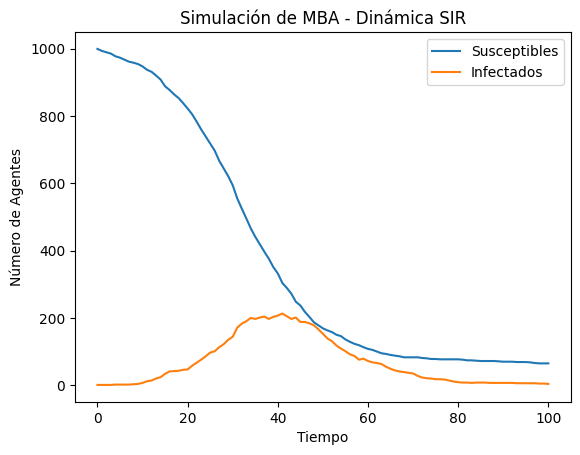

In [5]:
# 4. Si ejecutara su MBA y graficara el número total de susceptibles contra el número total de infectados (un espacio de estados proyectado),
# ¿esperaría que las trayectorias se vieran idénticas a las del modelo de ecuaciones diferenciales?

# No, no esperaríamos que las trayectorias fueran idénticas. Un factor clave que introduce diferencias en los MBA es la naturaleza estocástica de los
# eventos: los agentes individuales tienen comportamientos y probabilidades asociadas a eventos como el contagio o la recuperación, lo que hace que el
# comportamiento del modelo sea más variable y menos predecible que en las ecuaciones diferenciales, que asumen una tasa de cambio continua y determinista.

# Ejemplo:
# En un MBA, si un agente enferma por accidente y otro se recupera por un evento aleatorio, las trayectorias no serán suaves como en el modelo 
# determinista, ya que cada simulación podría tener resultados diferentes debido a la aleatoriedad inherente al proceso.

# Gráfico de ejemplo de un MBA vs. un modelo determinista

import numpy as np
import matplotlib.pyplot as plt

def simulate_sir(n_agents, infection_rate, recovery_rate, birth_rate, death_rate, steps):
    # Inicialización de estados de los agentes
    susceptible = n_agents - 1  # Un agente inicialmente infectado
    infected = 1
    recovered = 0

    susceptible_history = [susceptible]
    infected_history = [infected]

    # Simulación del proceso
    for _ in range(steps):
        new_infected = np.random.binomial(susceptible, infection_rate * infected / n_agents)
        new_recovered = np.random.binomial(infected, recovery_rate)
        births = np.random.binomial(n_agents, birth_rate)
        deaths_susceptible = np.random.binomial(susceptible, death_rate)
        deaths_infected = np.random.binomial(infected, death_rate)
        deaths_recovered = np.random.binomial(recovered, death_rate)

        # Actualización de los estados
        susceptible -= new_infected + deaths_susceptible
        infected += new_infected - new_recovered - deaths_infected
        recovered += new_recovered - deaths_recovered

        # Historial para graficar
        susceptible_history.append(susceptible)
        infected_history.append(infected)

    return susceptible_history, infected_history

# Parámetros de la simulación
n_agents = 1000
infection_rate = 0.3  # Tasa de infección
recovery_rate = 0.1  # Tasa de recuperación
birth_rate = 0.01  # Tasa de nacimiento
death_rate = 0.005  # Tasa de muerte

# Ejecutamos la simulación del MBA
susceptible_history, infected_history = simulate_sir(n_agents, infection_rate, recovery_rate, birth_rate, death_rate, 100)

# Graficamos el resultado
plt.plot(susceptible_history, label='Susceptibles')
plt.plot(infected_history, label='Infectados')
plt.xlabel('Tiempo')
plt.ylabel('Número de Agentes')
plt.title('Simulación de MBA - Dinámica SIR')
plt.legend()
plt.show()
